# IMPORTING NECCESSARY LIBRARIES:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## GET AND LOAD THE DATA:

In [2]:
from sklearn.datasets import load_iris
dataset=load_iris()

In [3]:
features=pd.DataFrame(dataset.data,columns=dataset.feature_names)
features.name='Features'
labels=pd.DataFrame(dataset.target)
labels.columns=['0/1/2']
labels.name='Labels'
combined=pd.concat([features,labels],axis=1)
print('Features:\n{}'.format(features))
print('Labels:\n{}'.format(labels))
print('Combined:\n{}'.format(combined))

Features:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
Labels:
     0/1/2
0        0


In [30]:
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
labels.head()

,0/1/2
0,0
1,0
2,0
3,0
4,0


In [8]:
labels.describe()

,0/1/2
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [9]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0/1/2   150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


## KNOW THE DATA:

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>],
       [<AxesSubplot:title={'center':'0/1/2'}>, <AxesSubplot:>]],
      dtype=object)

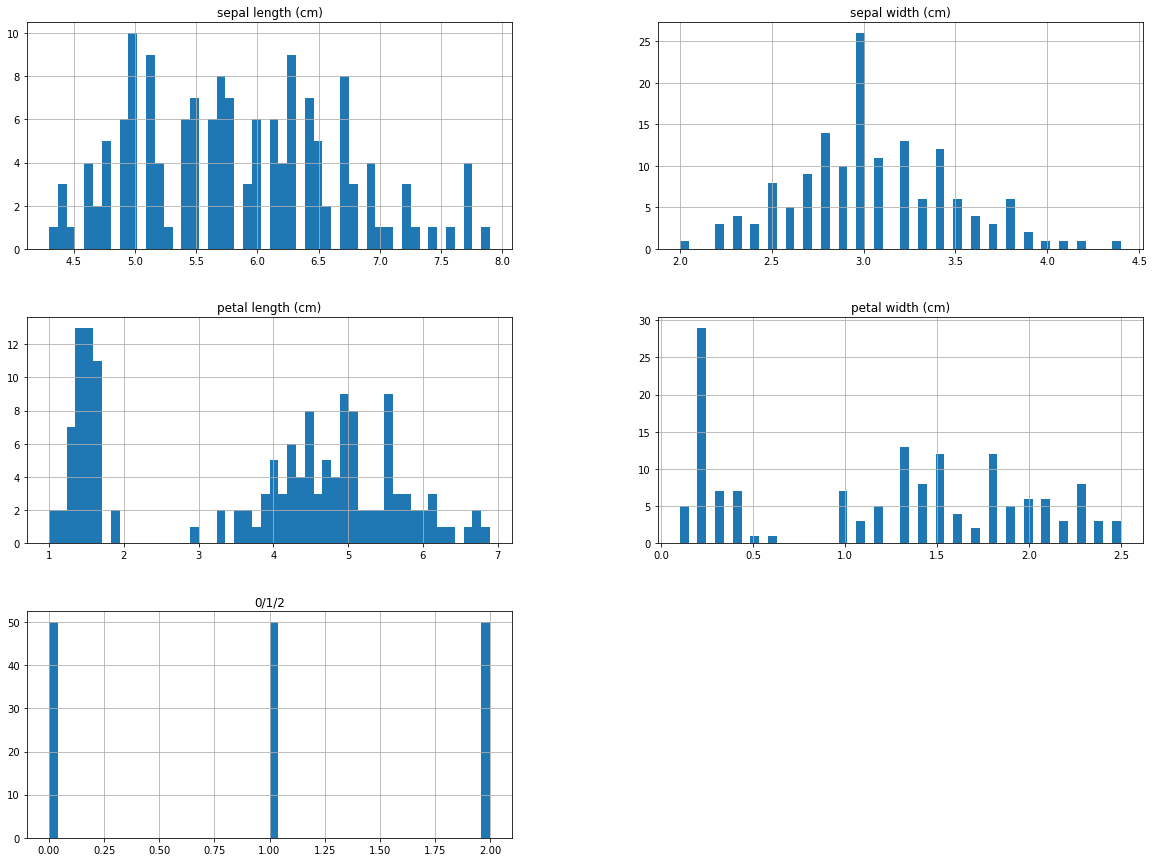

In [10]:
combined.hist(bins=50,figsize=(20,15))

## SEPARATING TRAIN AND TEST SET:

In [11]:
combined.corr()                                   #A wise way to select feature for stratified sampling.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0/1/2
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
0/1/2,0.782561,-0.426658,0.949035,0.956547,1.000000


In [12]:
#def func1(x):
    
combined['petal_width_integer']=np.ceil(combined['petal width (cm)'])

In [13]:
combined

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0/1/2,petal_width_integer
0,5.1,3.5,1.4,0.2,0,1.0
1,4.9,3.0,1.4,0.2,0,1.0
2,4.7,3.2,1.3,0.2,0,1.0
3,4.6,3.1,1.5,0.2,0,1.0
4,5.0,3.6,1.4,0.2,0,1.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,3.0
146,6.3,2.5,5.0,1.9,2,2.0
147,6.5,3.0,5.2,2.0,2,2.0
148,6.2,3.4,5.4,2.3,2,3.0


In [14]:
combined['petal_width_integer'].value_counts()/len(combined['petal_width_integer'])          #overall distribution of petal width

2.0    0.466667
1.0    0.380000
3.0    0.153333
Name: petal_width_integer, dtype: float64

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in sss.split(combined,combined['petal_width_integer']):
    train_set=combined.iloc[train_index]
    test_set=combined.iloc[test_index]

In [16]:
print('Train_set:\n{}'.format(train_set))
print('Test_set:\n{}'.format(test_set))

Train_set:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
26                 5.0               3.4                1.6               0.4   
118                7.7               2.6                6.9               2.3   
61                 5.9               3.0                4.2               1.5   
15                 5.7               4.4                1.5               0.4   
12                 4.8               3.0                1.4               0.1   
..                 ...               ...                ...               ...   
39                 5.1               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
115                6.4               3.2                5.3               2.3   
140                6.7               3.1                5.6               2.4   
37                 4.9               3.6                1.4               0.1   

     0/1/2  peta

In [17]:
train_set['petal_width_integer'].value_counts()/len(train_set['petal_width_integer'])

2.0    0.466667
1.0    0.383333
3.0    0.150000
Name: petal_width_integer, dtype: float64

In [18]:
test_set['petal_width_integer'].value_counts()/len(test_set['petal_width_integer'])

2.0    0.466667
1.0    0.366667
3.0    0.166667
Name: petal_width_integer, dtype: float64

In [19]:
train_set.drop(['petal_width_integer'],inplace=True,axis=1)

C:\Users\anuj.sali\AppData\Local\Temp\ipykernel_23688\3521116859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.drop(['petal_width_integer'],inplace=True,axis=1)


In [20]:
test_set.drop(['petal_width_integer'],inplace=True,axis=1)

C:\Users\anuj.sali\AppData\Local\Temp\ipykernel_23688\3834387376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.drop(['petal_width_integer'],inplace=True,axis=1)


## EXPLORATORY DATA ANALYSIS:

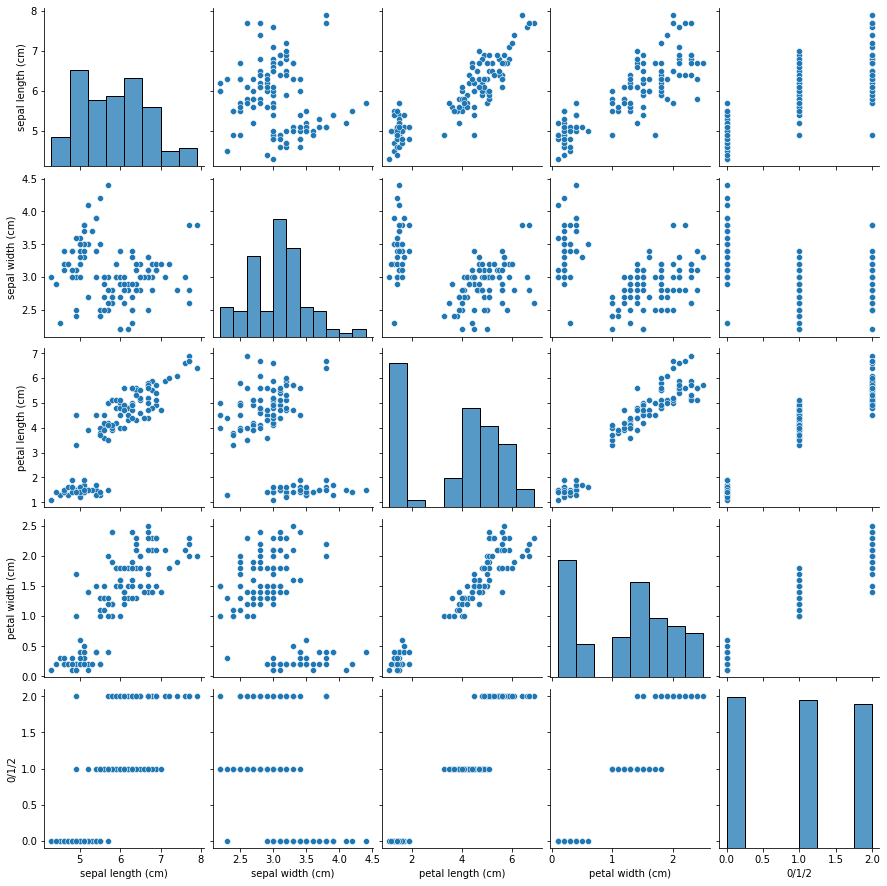

In [21]:
sns.pairplot(train_set)

## DATA PREP FOR ML MODELS:

In [22]:
x_train=train_set.drop(['0/1/2'],axis=1)
y_train=train_set.loc[:,['0/1/2']]
x_test=test_set.drop(['0/1/2'],axis=1)
y_test=test_set.loc[:,['0/1/2']]
print('x_train:\n{}'.format(x_train))
print('y_train:\n{}'.format(y_train))
print('x_test:\n{}'.format(x_test))
print('y_test:\n{}'.format(y_test))

x_train:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
26                 5.0               3.4                1.6               0.4
118                7.7               2.6                6.9               2.3
61                 5.9               3.0                4.2               1.5
15                 5.7               4.4                1.5               0.4
12                 4.8               3.0                1.4               0.1
..                 ...               ...                ...               ...
39                 5.1               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
115                6.4               3.2                5.3               2.3
140                6.7               3.1                5.6               2.4
37                 4.9               3.6                1.4               0.1

[120 rows x 4 columns]
y_train:
     0/1/2
26       0


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [24]:
num_pipeline=Pipeline([('stdscaler',StandardScaler())])
full_pipeline=ColumnTransformer([('num_pipeline',num_pipeline,x_train.columns)])
x_train_prepared=full_pipeline.fit_transform(x_train)
print('X_train_prepared:\n{}'.format(x_train_prepared))

X_train_prepared:
[[-1.028767    0.79082973 -1.21941263 -1.0492069 ]
 [ 2.25517889 -1.07911249  1.80298188  1.46624182]
 [ 0.06588163 -0.14414138  0.26327147  0.40710552]
 [-0.17737362  3.12825751 -1.27643894 -1.0492069 ]
 [-1.27202225 -0.14414138 -1.33346525 -1.44638301]
 [-1.15039463 -1.54659805 -0.24996533 -0.25485467]
 [ 1.16053026  0.32334418  1.23271877  1.46624182]
 [-0.90713937  1.72580084 -1.21941263 -1.31399098]
 [ 1.16053026 -0.14414138  1.00461352  1.20145774]
 [ 1.28215789  0.32334418  1.11866614  1.46624182]
 [-0.42062887  1.02457251 -1.39049156 -1.31399098]
 [ 1.28215789  0.0896014   0.94758721  1.20145774]
 [ 1.03890264 -0.14414138  0.83353459  1.46624182]
 [-0.29900125 -0.37788416 -0.0788864   0.14232144]
 [-1.028767    1.25831529 -1.33346525 -1.31399098]
 [ 2.49843414  1.72580084  1.51785033  1.06906571]
 [-0.90713937  1.49205807 -1.27643894 -1.0492069 ]
 [-0.5422565   0.79082973 -1.27643894 -1.0492069 ]
 [ 1.03890264  0.55708695  1.11866614  1.7310259 ]
 [ 0.67401976

## TRAINING TRAINING SET:

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_prepared,y_train)

c:\Users\anuj.sali\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [27]:
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train_prepared,y_train)


C:\Users\anuj.sali\AppData\Local\Temp\ipykernel_23688\736733497.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(x_train_prepared,y_train)


RandomForestClassifier()

## TESTING ON FINAL TEST SET:

In [28]:
x_test_prepared=full_pipeline.transform(x_test)
y_pred_knn=knn.predict(x_test_prepared)
print('{:.2f}'.format(knn.score(x_test_prepared,y_test)))

0.97


In [29]:
y_pred_rf=rf_clf.predict(x_test_prepared)
print('{:.2f}'.format(rf_clf.score(x_test_prepared,y_test)))

0.93
